i =  0 , j =  1
i =  0 , j =  2
i =  0 , j =  3
i =  0 , j =  4
i =  0 , j =  5
i =  0 , j =  6
i =  0 , j =  7
i =  0 , j =  8
i =  0 , j =  9
i =  0 , j =  10
i =  1 , j =  0
i =  1 , j =  2
i =  1 , j =  3
i =  1 , j =  4
i =  1 , j =  5
i =  1 , j =  6
i =  1 , j =  7
i =  1 , j =  8
i =  1 , j =  9
i =  1 , j =  10
i =  2 , j =  0
i =  2 , j =  1
i =  2 , j =  3
i =  2 , j =  4
i =  2 , j =  5
i =  2 , j =  6
i =  2 , j =  7
i =  2 , j =  8
i =  2 , j =  9
i =  2 , j =  10
i =  3 , j =  0
i =  3 , j =  1
i =  3 , j =  2
i =  3 , j =  4
i =  3 , j =  5
i =  3 , j =  6
i =  3 , j =  7
i =  3 , j =  8
i =  3 , j =  9
i =  3 , j =  10
i =  4 , j =  0
i =  4 , j =  1
i =  4 , j =  2
i =  4 , j =  3
i =  4 , j =  5
i =  4 , j =  6
i =  4 , j =  7
i =  4 , j =  8
i =  4 , j =  9
i =  4 , j =  10
i =  5 , j =  0
i =  5 , j =  1
i =  5 , j =  2
i =  5 , j =  3
i =  5 , j =  4
i =  5 , j =  6
i =  5 , j =  7
i =  5 , j =  8
i =  5 , j =  9
i =  5 , j =  10
i =  6 , j =  0
i =  6 , j =  1
i 

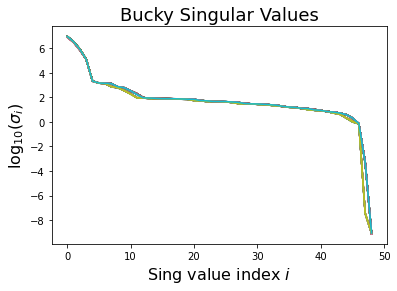

In [3]:
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt 

def kMeans(X, K, maxIters = 20, plot_progress = None):

    centroids = X[np.random.choice(len(X), K)]
    for i in range(maxIters):
        #print(i)
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

#################################################################
#SETUP
X = loadmat("RawData.mat")['X']
y = loadmat("RawData.mat")['y']
Xones = np.ones((len(X),1))

TwoNormCol = np.zeros((len(X.T),1))

#Remove keyword columns (poorly treated data)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)

#Normalize columns to 2-norm
for i in range(len(X.T)):
    TwoNormCol[i] = np.sqrt(X[i,:]@X[i,:])
    X[i,:] = X[i,:]/TwoNormCol[i]
#print(TwoNormCol)
#print(X[0,:])
#print(y)
    
#Form subsets (indices, first group is full X)
Xsubs = np.array([[0,49],[0,5],[5,7],[7,9],[9,11],[11,17],[17,20],[20,26],[28,33],[33,37],[37,45],[45,49]])

#Create and run over 11 sets of 3604 entries from X and y,
#using 1 as a primary test set (when needed for lambda)
setArr = np.array([[0,int(len(X)/11)],[int(len(X)/11),int(2*len(X)/11)],[int(2*len(X)/11),int(3*len(X)/11)],\
                   [int(3*len(X)/11),int(4*len(X)/11)],[int(4*len(X)/11),int(5*len(X)/11)],\
                   [int(5*len(X)/11),int(6*len(X)/11)],[int(6*len(X)/11),int(7*len(X)/11)],\
                   [int(7*len(X)/11),int(8*len(X)/11)],[int(8*len(X)/11),int(9*len(X)/11)],\
                   [int(9*len(X)/11),int(10*len(X)/11)],[int(10*len(X)/11),int(len(X))]])
#print(setArr)


#Error tally storage
errorOrig = 0

XdifMin = np.zeros((110,1))
XdifVal = np.zeros((110,1))

################################

#Only testing full X set
#for Xset in range(1):

sMatrix = np.zeros((110,len(X.T)))

Xset = 0
tal = 0
for i in range(11):
    for j in range(11):
        if i != j:
            print("i = ",i,", j = ",j)
            testTally = 0
            #Set up Training and testing sets
            for k in range(11):
                if i == k:
                    XTest1 = X[setArr[i,0]:setArr[i,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
                    #print(XTest1)
                    yTest1 = y[setArr[i,0]:setArr[i,1]]
                    #print(yTest1)
                if j == k:
                    XTest2 = X[setArr[j,0]:setArr[j,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
                    #print(XTest2)
                    yTest2 = y[setArr[j,0]:setArr[j,1]]
                    #print(yTest2)
                if k != j and k != i:
                    if testTally == 0:
                        XTrain = X[setArr[k,0]:setArr[k,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
                        yTrain = y[setArr[k,0]:setArr[k,1]]
                        testTally = 1
                    else:
                        XTrain = np.concatenate((XTrain, X[setArr[k,0]:setArr[k,1],Xsubs[Xset,0]:Xsubs[Xset,1]]),\
                                               axis=0)
                        yTrain = np.concatenate((yTrain, y[setArr[k,0]:setArr[k,1]]), axis=0)
            #print(len(XTrain))
             
            U,s,VT = np.linalg.svd(XTrain,full_matrices=False)
            #print(s)

            sMatrix[tal,:] = s
            
            tal = tal + 1
            
            
#print(sMatrix)           
            
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(sMatrix[:,:].T))
ax.set_xlabel('Sing value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()


